## LOADING THE DATA¶


Let's start by importing the libraries that we will need to load and explore the data.

In [ ]:
from pathlib import Path

import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt

Next, we can load the datasets and begin taking a look.


In [ ]:
#read data
training_features_data = pd.read_csv("training_set_features.csv",
                    sep=',')


training_set_labels = pd.read_csv("training_set_labels.csv",
                    sep=',')


test_features_data = pd.read_csv("test_set_features.csv",
                    sep=',')
submission_format = pd.read_csv("submission_format.csv")


In [ ]:
#preview data
print("training_features_data", training_features_data.shape)
training_features_data.head()

training_features_data (26707, 36)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,out-of-category,out-of-category
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,out-of-category,out-of-category
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


Each row is a person who was a survey respondent. The columns are the feature values corresponding to those people. We have 26,707 observations and 35 features.

In [ ]:
#see the type of the training data
training_features_data.dtypes


respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

Now let's look at the labels.



In [ ]:
print("training_set_labels.shape", training_set_labels.shape)
training_set_labels.head()

training_set_labels.shape (26707, 2)


,h1n1_vaccine,seasonal_vaccine
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


We have the same 26,707 observations, and two target variables that we have labels for.

## EXPLORING THE DATA¶

## Labels¶
Let's start by taking a look at our distribution of the two target variables.


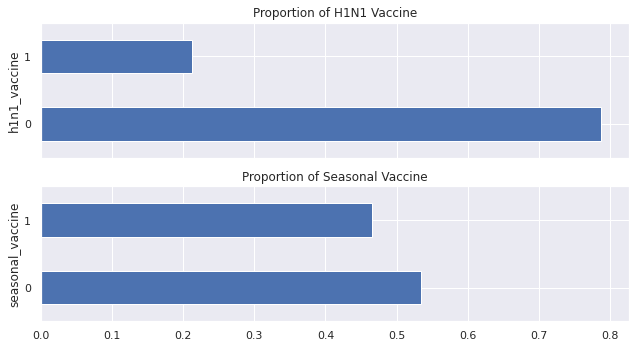

In [ ]:
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = training_set_labels.shape[0]

(training_set_labels['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0])
)
ax[0].set_ylabel("h1n1_vaccine")

(training_set_labels['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
)
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()

In [ ]:
pd.crosstab(
    training_set_labels["h1n1_vaccine"], 
    training_set_labels["seasonal_vaccine"], 
    margins=True,
    normalize=True
)

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


## Features¶


Next, let's take a look at our features. From the problem description page, we know that the feature variables are almost all categorical: a mix of binary, ordinal, and nominal features. Let's pick a few and see how the rates of vaccination may differ across the levels of the feature variables.

First, let's combine our features and labels into one dataframe.

In [ ]:
joined_df = training_features_data.join(training_set_labels)
print(joined_df.shape)
joined_df.head()

(26707, 38)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,out-of-category,out-of-category,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,out-of-category,out-of-category,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


## Prototyping a Plot¶


Next, let's see how the features are correlated with the target variables. 

Jumping right to the right final visualization is hard. I instead pick one feature and one target and work my way up to a prototype, before applying it to more features and both targets. I'll use h1n1_concern, the level of concern the person showed about the H1N1 flu, and h1n1_vaccine as a target variable.

First, we'll get the count of observations for each combination of those two variables.



In [ ]:
counts = (joined_df[['h1n1_concern', 'h1n1_vaccine']]
              .groupby(['h1n1_concern', 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine')
         )
counts

h1n1_vaccine,0,1
h1n1_concern,,
0.000000,2849,447
1.000000,6756,1397
1.618486,76,16
2.000000,8102,2473
3.000000,3250,1341


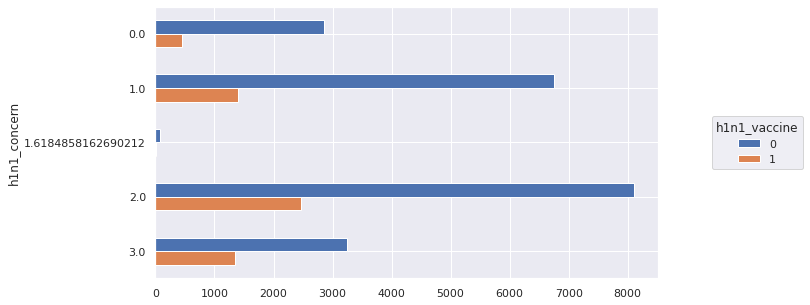

In [ ]:
ax = counts.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center right', 
    bbox_to_anchor=(1.3, 0.5), 
    title='h1n1_vaccine'
)

Unfortunately, it's still hard to tell whether h1n1_concern levels show differences in someone's likelihood to get vaccinated. Since the two classes are imbalanced, we just see fewer vaccinated observations for every level of h1n1_concern. It swamps out any other trends that might exist.

Let's instead look at the rate of vaccination for each level of h1n1_concern.

In [ ]:
h1n1_concern_counts = counts.sum(axis='columns')
h1n1_concern_counts

h1n1_concern
0.000000     3296
1.000000     8153
1.618486       92
2.000000    10575
3.000000     4591
dtype: int64

In [ ]:
props = counts.div(h1n1_concern_counts, axis='index')
props

h1n1_vaccine,0,1
h1n1_concern,,
0.000000,0.864381,0.135619
1.000000,0.828652,0.171348
1.618486,0.826087,0.173913
2.000000,0.766147,0.233853
3.000000,0.707907,0.292093


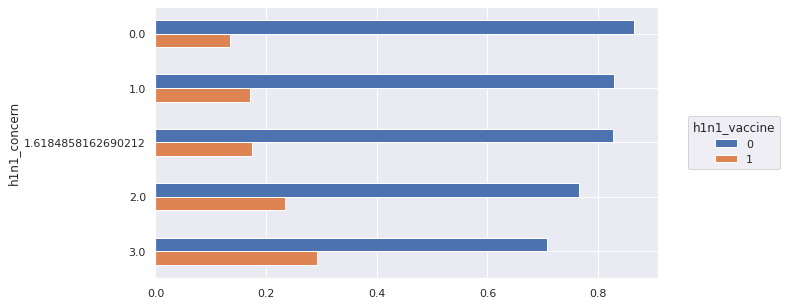

In [ ]:
ax = props.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)

Now we have a clearer picture of what's happening. In this plot, each pair of blue (no vaccine) and orange (received vaccine) bars add up to 1.0. We can clearly see that even though most people don't get the H1N1 vaccine, they are more likely to if they have a higher level of concern. It looks like h1n1_concern will be a useful feature when we build our model.

## Plotting more variables¶

Let's factor this code into a function so we can use it on more variables.


In [ ]:
def vaccination_rate_plot(col, target, data, ax=None):
    counts = (joined_df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

Then, we'll loop through several columns and plot against both h1n1_vaccine and seasonal_vaccine.



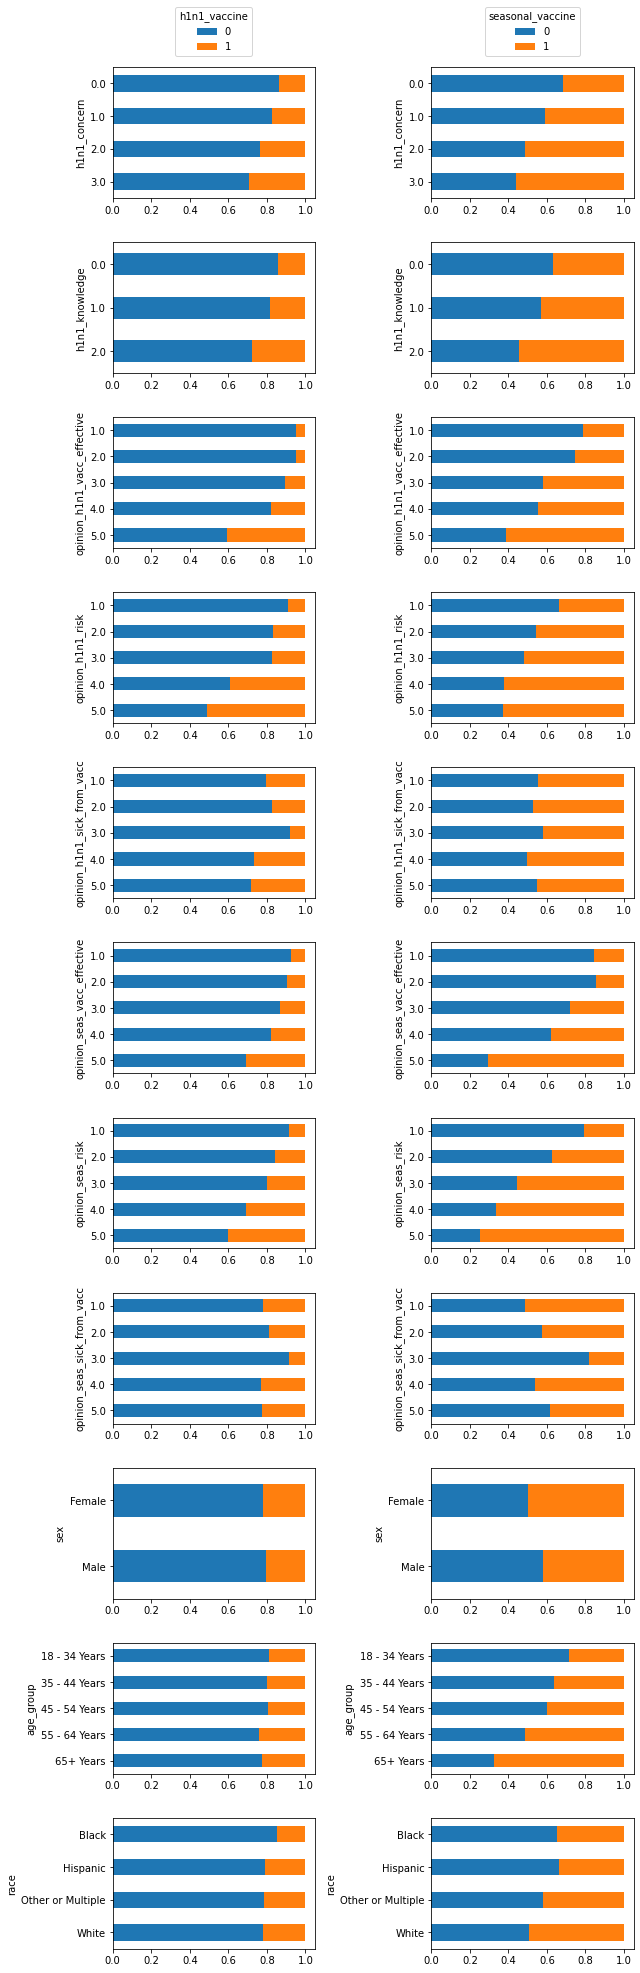

In [ ]:
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(9,len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', joined_df, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', joined_df, ax=ax[idx, 1]
    )
    
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

Create the plots to see the count of each features

In [ ]:
training_set_features = training_features_data.drop(columns = ["respondent_id"], axis = 1)
test_set_features = test_features_data.drop(columns = ["respondent_id"], axis = 1)
training_set_labels = training_set_labels.drop(columns = ["respondent_id"], axis = 1)

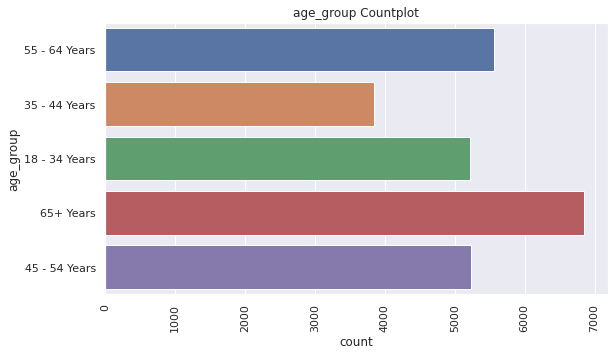

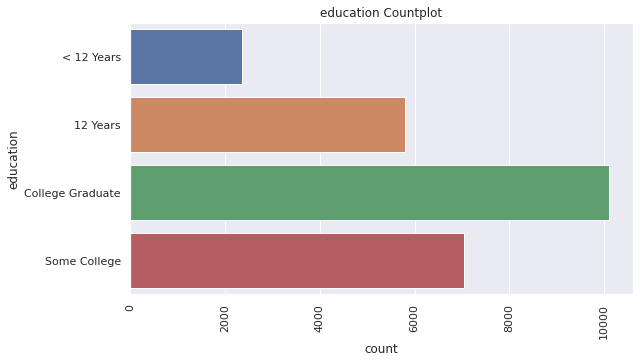

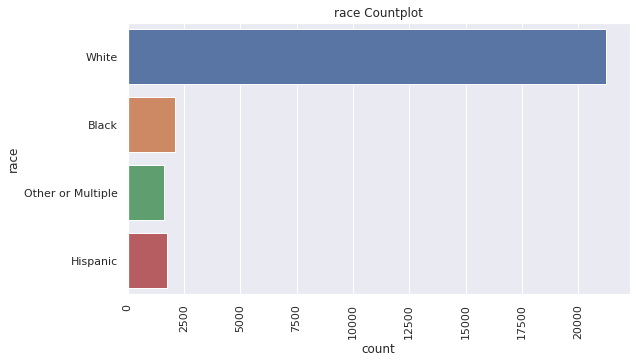

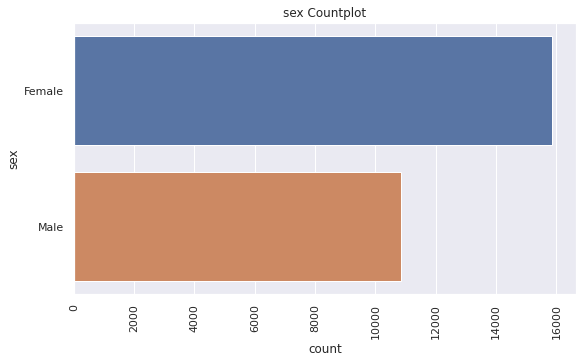

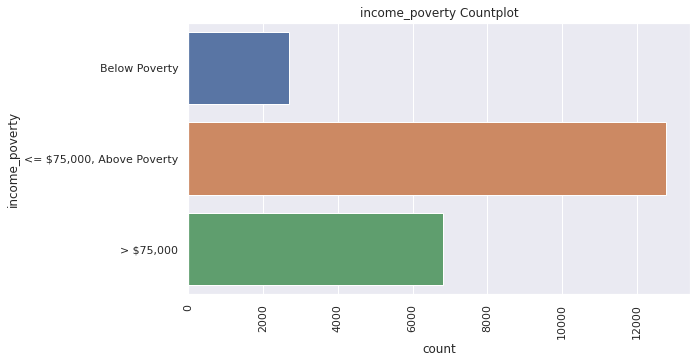

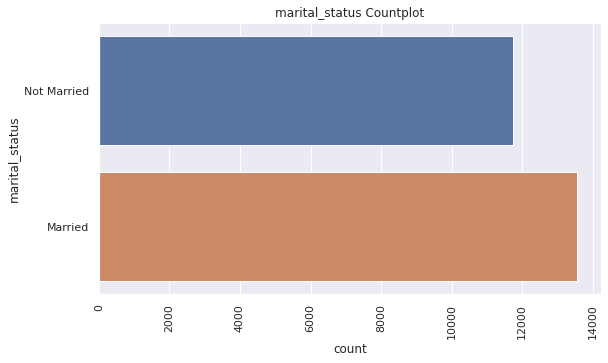

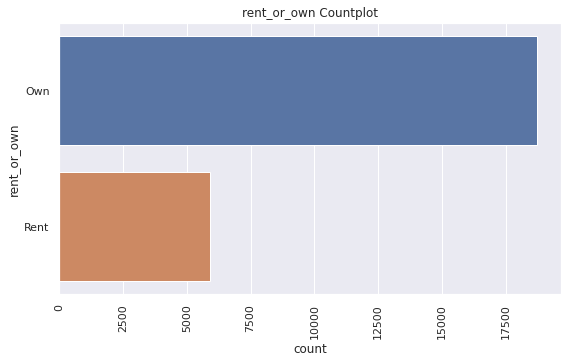

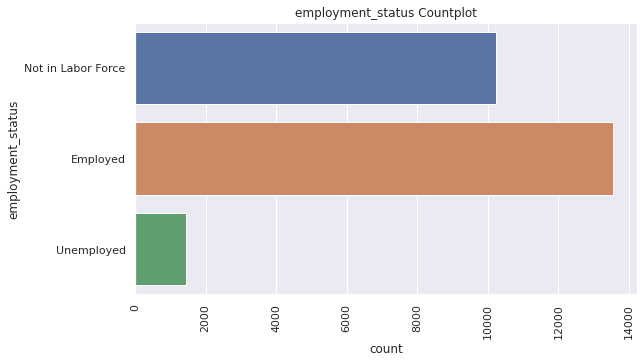

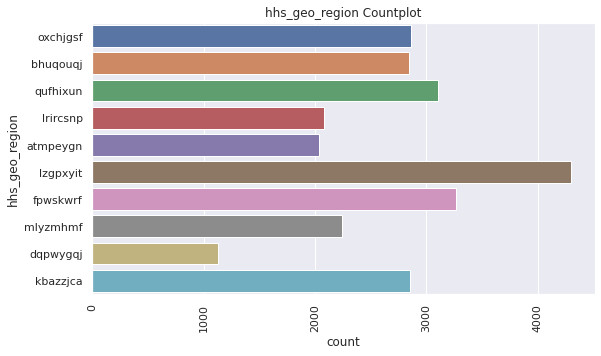

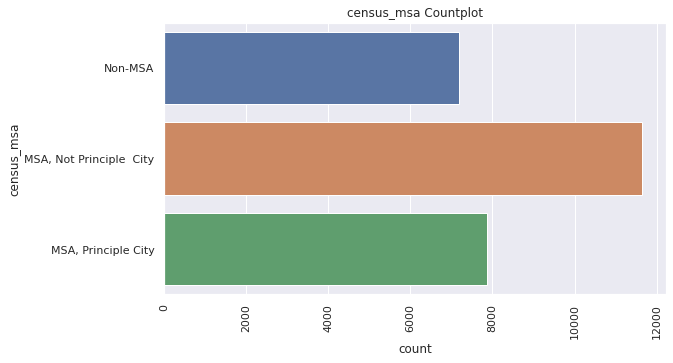

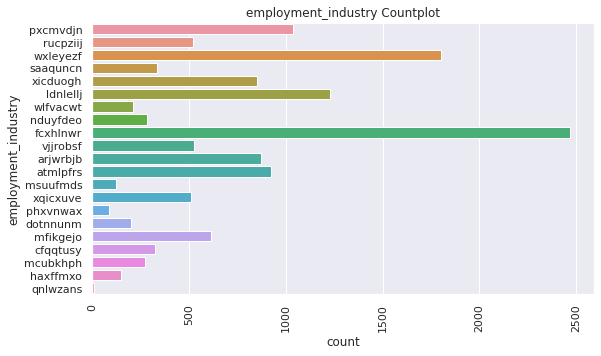

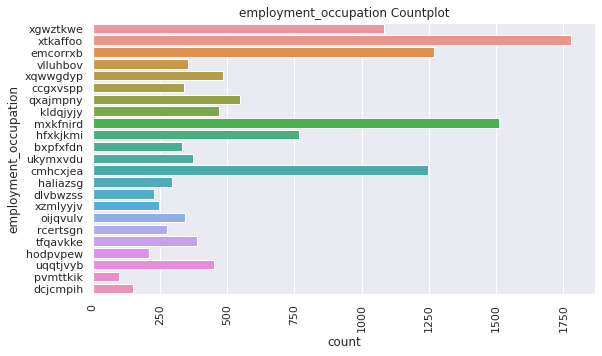

In [ ]:
#train features object columns countplot
for col in training_set_features[training_set_features.dtypes[training_set_features.dtypes == "object"].index].columns:
    sns.set(rc={'figure.figsize':(9,5)})
    sns.countplot(y = training_set_features[col])
    plt.title( col +" Countplot")
    plt.xticks(rotation=90)
    plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


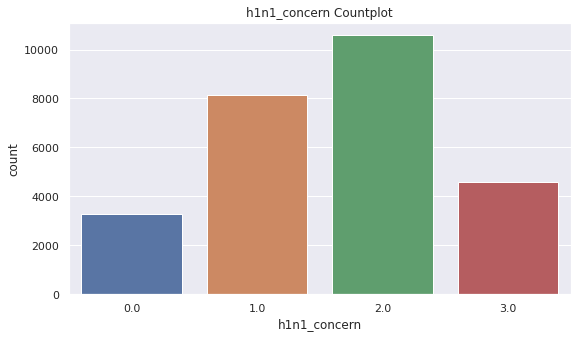

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


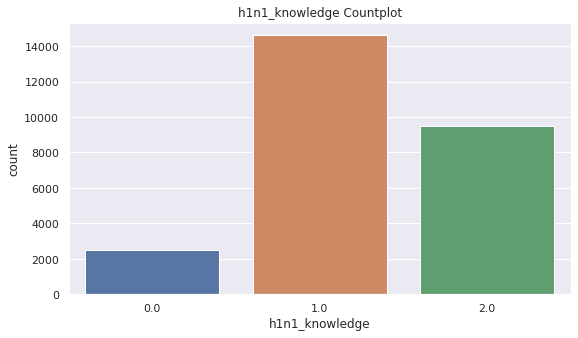

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


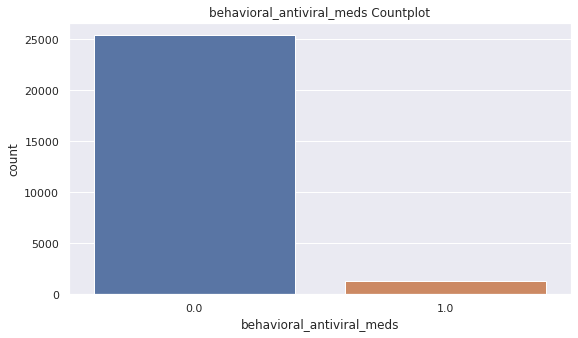

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


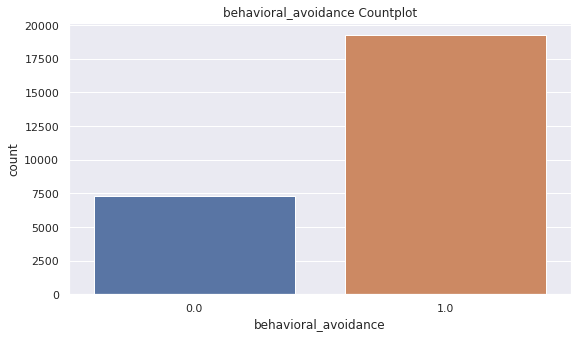

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


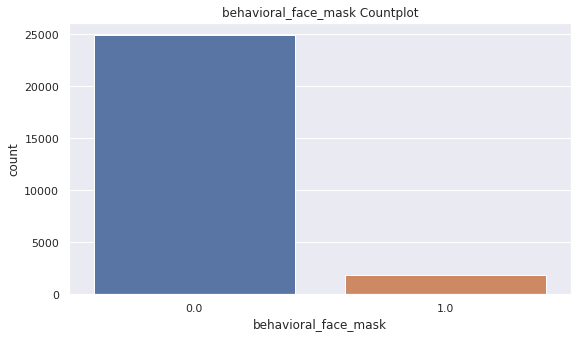

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


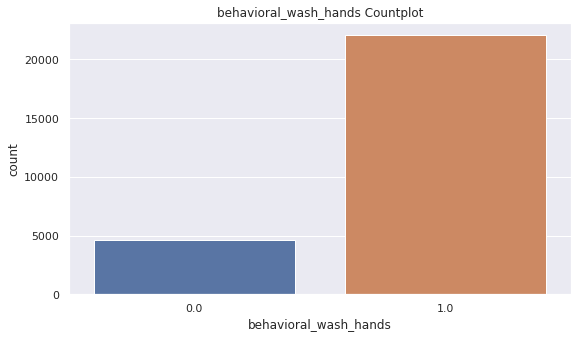

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


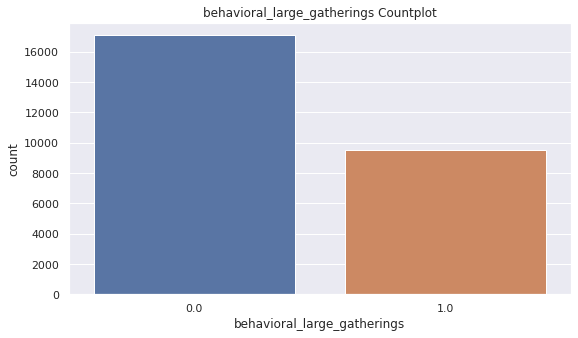

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


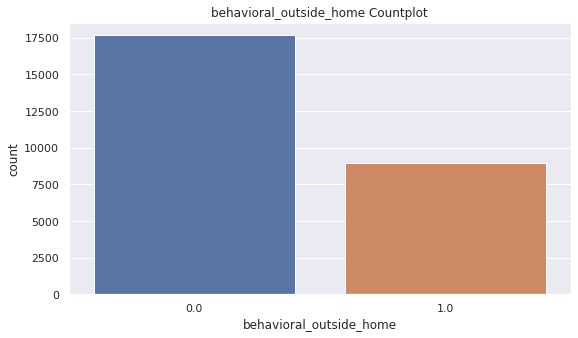

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


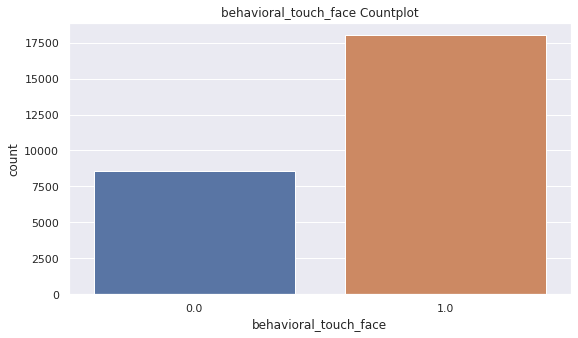

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


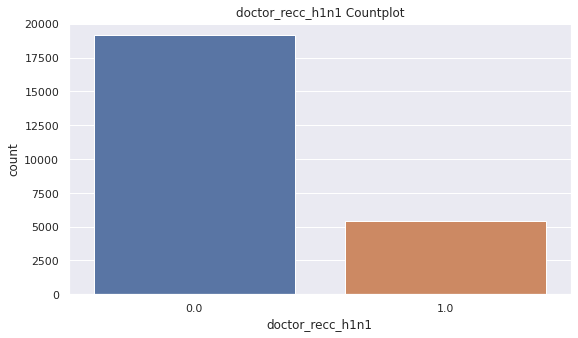

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


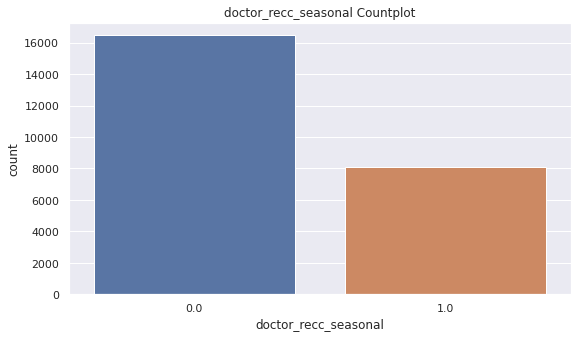

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


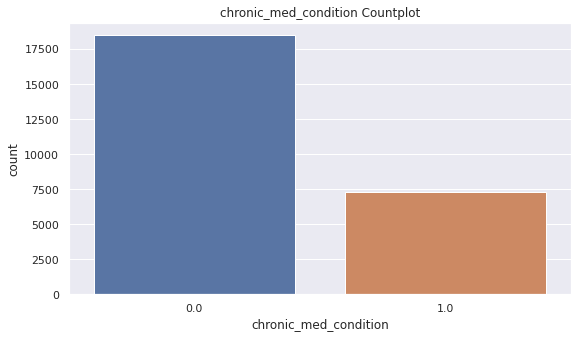

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


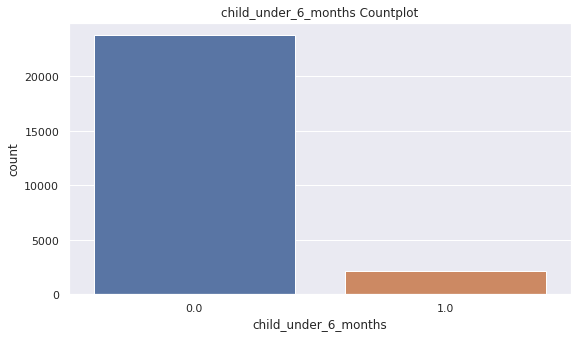

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


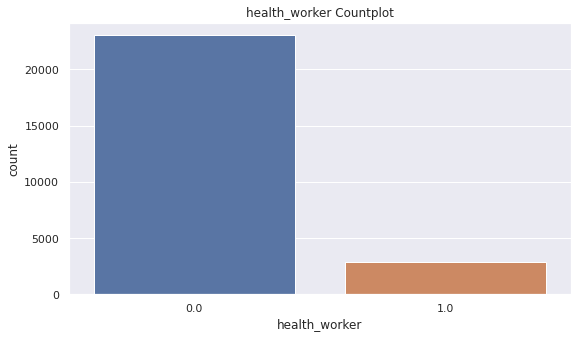

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


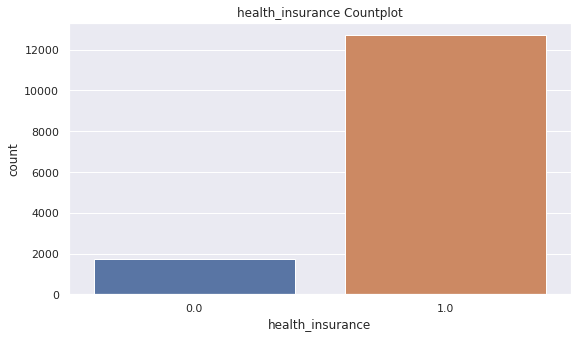

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


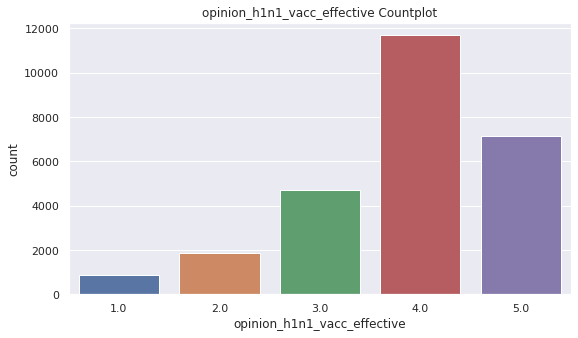

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


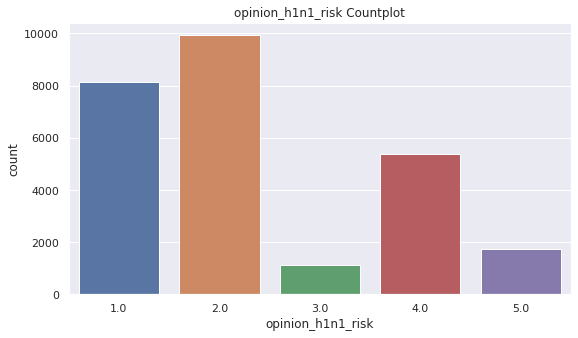

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


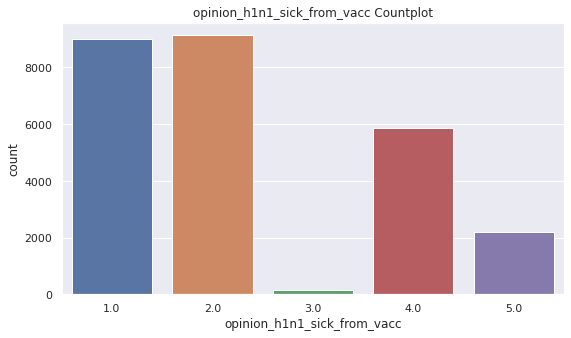

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


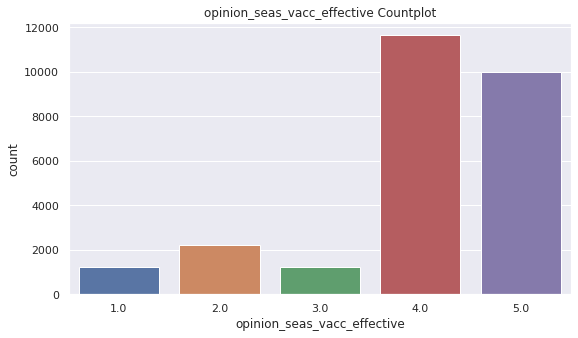

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


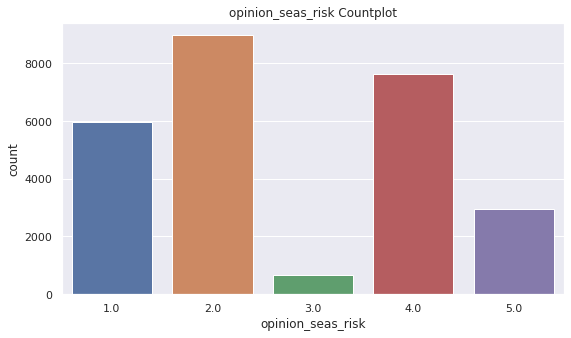

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


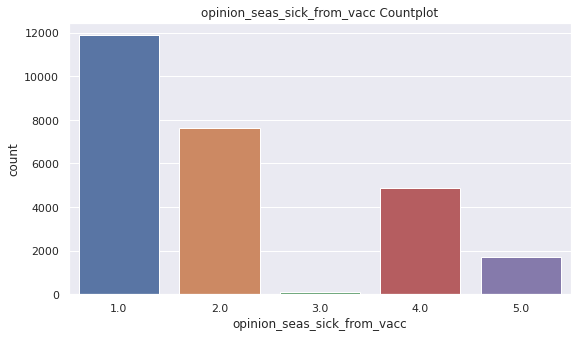

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


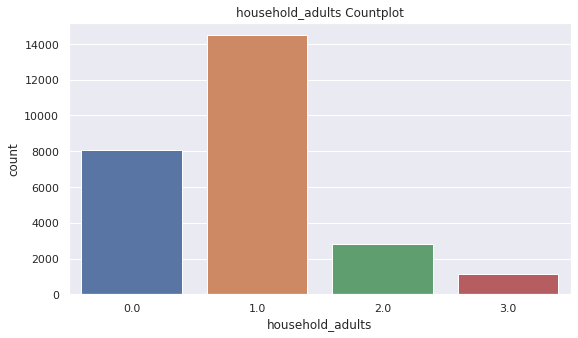

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


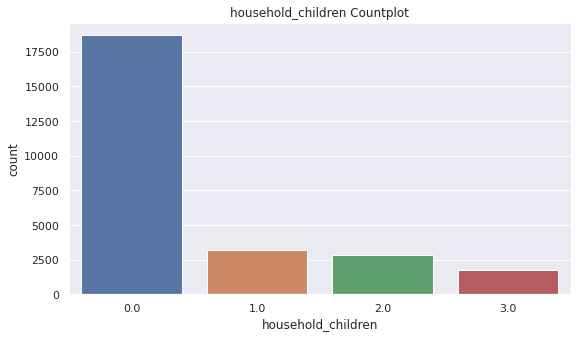

In [ ]:
#train features non object columns countplot
for col in training_set_features[training_set_features.dtypes[training_set_features.dtypes != "object"].index].columns:
    sns.countplot(training_set_features[col])
    plt.title( col +" Countplot")
    plt.show()

## BUILDING SOME MODELS¶


Joining dataset

In [ ]:
TRAIN = training_set_features.join(training_set_labels)
print(TRAIN.shape)
TRAIN.head()

(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


Preprocessing


In [ ]:
#defining object and numerical features
obj_features = training_set_features[training_set_features.dtypes[training_set_features.dtypes == "object"].index].columns

num_features = training_set_features[training_set_features.dtypes[training_set_features.dtypes != "object"].index].columns

print("object features :")
print(obj_features)
print("numerical features :")
print(num_features)

object features :
Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'],
      dtype='object')
numerical features :
Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')


In [ ]:
#create pipeline

#import packages
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

#numerical pipeline
num_pipelines = Pipeline([
    ('Standard Scaler', StandardScaler()),
    ('Simple Imputer', SimpleImputer(strategy = 'mean'))
])

#categorical pipeline
cat_pipeline = Pipeline([
     ('Simple Imputer', SimpleImputer(strategy='constant', 
                                      fill_value='missing')),
    ('Label Encoder', OneHotEncoder())
])

In [ ]:
#combine those pipeline

#import package
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers = [
        ('Numerical', num_pipelines, num_features),
        ('Categorical', cat_pipeline, obj_features)  
    ],
    remainder = "drop"
)

Data splitting

In [ ]:
#splitting data using train_test_split
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(training_set_features,
                                                 training_set_labels,
                                                 test_size = 0.1,
                                                 random_state = 42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((24036, 35), (2671, 35), (24036, 2), (2671, 2))

# MODELLING - Random Forest Classifier

In [ ]:
#fitting preprocessing pipeline
X_train_prep = pd.DataFrame(preprocessor.fit_transform(X_train))
X_val_prep =  pd.DataFrame(preprocessor.transform(X_val))

#checking shape
print ('X_train_prep.shape' , X_train_prep.shape)
print ('X_eval_prep.shape' , X_val_prep.shape)

X_train_prep.shape (24036, 112)
X_eval_prep.shape (2671, 112)


In [ ]:
#fitting preprocessing pipeline (test dataset)
test_prep = pd.DataFrame(preprocessor.transform(test_set_features))
print ('test_prep.shape' , test_prep.shape)

test_prep.shape (26708, 112)


In [ ]:
#model

#import package
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_prep, y_train)

RandomForestClassifier()

In [ ]:
#predict validation data
predict_val = model.predict_proba(X_val_prep)
predict_val

[array([[0.78, 0.22],
        [0.75, 0.25],
        [0.84, 0.16],
        ...,
        [0.9 , 0.1 ],
        [0.58, 0.42],
        [0.89, 0.11]]), array([[0.7 , 0.3 ],
        [0.67, 0.33],
        [0.23, 0.77],
        ...,
        [0.8 , 0.2 ],
        [0.18, 0.82],
        [0.47, 0.53]])]

In [ ]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": predict_val[0][:, 1],
        "seasonal_vaccine": predict_val[1][:, 1],
    },
    index = y_val.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (2671, 2)


,h1n1_vaccine,seasonal_vaccine
15772,0.22,0.30
9407,0.25,0.33
16515,0.16,0.77
23353,0.17,0.17
10008,0.05,0.20


In [ ]:
#ROC score
from sklearn.metrics import roc_curve, roc_auc_score

roc_auc_score(y_val, y_preds)

0.8624808007918124

In [ ]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )


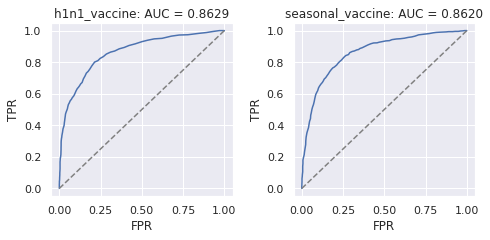

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_val['h1n1_vaccine'], 
    y_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_val['seasonal_vaccine'], 
    y_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()


# OPTIMIZING MODEL


In [ ]:
#import package
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#define parameter for RandomForestClassifier
params = {
    'bootstrap': [True, False],
    'max_depth': [6,8,10, 20],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600]
        }

rf = RandomForestClassifier()

random_search = RandomizedSearchCV(estimator=rf, 
                                   param_distributions=params, 
                                   scoring='roc_auc', 
                                   verbose=10)
random_search.fit(X_train_prep, y_train)

print(random_search.best_estimator_)
print(random_search.best_params_)
print(random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400
[CV 1/5; 1/10] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.861 total time=  13.4s
[CV 2/5; 1/10] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400
[CV 2/5; 1/10] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.856 total time=  12.1s
[CV 3/5; 1/10] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400
[CV 3/5; 1/10] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.860 total time=  12.5s
[CV 4/5; 1/10] START bootstrap=True, max_depth=20, max_features=auto, min_samp

Validating

In [ ]:
validation_pred = random_search.predict_proba(X_val_prep)
validation_pred

[array([[0.80719989, 0.19280011],
        [0.79755087, 0.20244913],
        [0.84626945, 0.15373055],
        ...,
        [0.90587363, 0.09412637],
        [0.63394212, 0.36605788],
        [0.81803475, 0.18196525]]), array([[0.73565232, 0.26434768],
        [0.72748648, 0.27251352],
        [0.28919181, 0.71080819],
        ...,
        [0.86462893, 0.13537107],
        [0.22981729, 0.77018271],
        [0.38318639, 0.61681361]])]

In [ ]:
y_preds_validation = pd.DataFrame(
    {
        "h1n1_vaccine": validation_pred[0][:, 1],
        "seasonal_vaccine": validation_pred[1][:, 1],
    },
    index = y_val.index
)
print("y_preds.shape:", y_preds_validation.shape)
y_preds_validation.head()

y_preds.shape: (2671, 2)


,h1n1_vaccine,seasonal_vaccine
15772,0.192800,0.264348
9407,0.202449,0.272514
16515,0.153731,0.710808
23353,0.198043,0.297279
10008,0.061118,0.190195


In [ ]:
#ROC score
roc_auc_score(y_val, y_preds_validation)

0.8677363723192945

In [ ]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

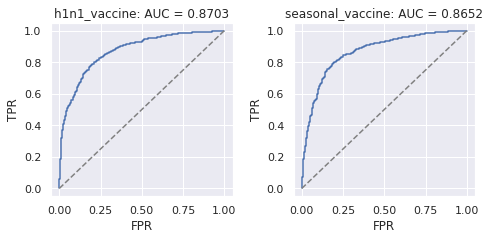

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_val['h1n1_vaccine'], 
    y_preds_validation['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_val['seasonal_vaccine'], 
    y_preds_validation['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

# GENERATING THE PREDICTIONS FOR THE TEST SET

In [ ]:
test_pred = random_search.predict_proba(test_prep)
test_pred

[array([[0.80758871, 0.19241129],
        [0.9660236 , 0.0339764 ],
        [0.71387168, 0.28612832],
        ...,
        [0.85595225, 0.14404775],
        [0.92611396, 0.07388604],
        [0.53042542, 0.46957458]]), array([[0.64446234, 0.35553766],
        [0.94385816, 0.05614184],
        [0.26316064, 0.73683936],
        ...,
        [0.74590361, 0.25409639],
        [0.63664726, 0.36335274],
        [0.34372853, 0.65627147]])]

In [ ]:
y_preds_test = pd.DataFrame(
    {
        "h1n1_vaccine": test_pred[0][:, 1],
        "seasonal_vaccine": test_pred[1][:, 1],
    },
    index = submission_format.index
)
print("y_preds.shape:", y_preds_test.shape)
y_preds_test.head()

y_preds.shape: (26708, 2)


,h1n1_vaccine,seasonal_vaccine
0,0.192411,0.355538
1,0.033976,0.056142
2,0.286128,0.736839
3,0.569487,0.845201
4,0.292289,0.529168


In [ ]:
# Create the dataset that comply with the submission format
submission_format = submission_format.drop(columns=["h1n1_vaccine","seasonal_vaccine"],
                                           axis = 1)

In [ ]:
flu_submission = submission_format.join(y_preds_test)
print(flu_submission.shape)
flu_submission.head()

(26708, 3)


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.192411,0.355538
1,26708,0.033976,0.056142
2,26709,0.286128,0.736839
3,26710,0.569487,0.845201
4,26711,0.292289,0.529168


In [ ]:
# Export the data back to a CSV file.
from google.colab import files
flu_submission.to_csv('flu_submission.csv',index=False) 
files.download('flu_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>